# Лабораторная работа 1. Линейная регрессия и факторный анализ
## 1. Введение
**Цель работы:** изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качество. 
**Задачи:**
Провести обучение модели линейной регрессии на датасете с Kaggle:
1. Загрузить датасет из репозитория (например, kaggle.com или аналогичных платформ).
2. Подготовить данные: провести первичный анализ, визуализировать распределение признаков и целевой переменной. 
3. Провести предобработку данных: удалить пропущенные значения, закодировать категориальные переменные (опционально), нормализовать признаки.
4. Построить матрицу корреляций. Сделать выводы о наличии мультиколлинеарности (расчет VIF-коэффициента).
5. Построить регрессионные модели (линейная и гребневая). Если целевая переменная - категориальная, то исследовать логистическую регрессию. Разделить на тренировочную и тестовую выборки (80/20 или 70/30). Использовать кросс-валидацию. Оценить качество построенной модели с помощью метрик: RMSE (Root Mean Square Error), R² (коэффициент детерминации) и MAPE (Mean Absolute Percentage Error).
6. Устранить мультиколлинеарность и снизить размерность признаков с помощью метода главных компонент (PCA).
7. Повторить шаг 5 (линейная и гребневая регрессия), но использовать в качестве признаков не исходные данные, а главные компоненты. Сравнить метрики качества (RMSE, R² и MAPE) моделей, обученных на исходных данных и на главных компонентах.

## 2. Описание датасета
Датасет содержит **506 наблюдений** и включает **14 признаков**:
*Входные признаки:*
1. **CRIM** — уровень преступности на душу населения по городу.  
2. **ZN** — доля земель, предназначенных под жилую застройку участков площадью свыше 25 000 кв. футов.  
3. **INDUS** — доля акров, занятых нерозничным бизнесом, на город.  
4. **CHAS** — бинарная переменная, указывающая, граничит ли район с рекой Чарльз (1 — да, 0 — нет).  
5. **NOX** — концентрация оксидов азота (в частях на 10 миллионов).  
6. **RM** — среднее количество комнат в жилом помещении.  
7. **AGE** — доля квартир, принадлежащих владельцам и построенных до 1940 года.  
8. **DIS** — взвешенное расстояние до пяти центров занятости в Бостоне.  
9. **RAD** — индекс доступности радиальных магистралей.  
10. **TAX** — ставка полного налога на недвижимость на каждые 10 000 долларов стоимости.  
11. **PTRATIO** — соотношение числа учащихся к числу учителей по городу.  
12. **B** — показатель, рассчитываемый по формуле \( B = 1000(B_k - 0.63)^2 \), где \( B_k \) — доля афроамериканцев в городе.  
13. **LSTAT** — процент населения с низким социальным статусом.

*Целевая переменная:*
1. **MEDV** — медианная стоимость принадлежащих владельцам домов в тысячах долларов США (k$).

In [ ]:
import pandas as pd

df = pd.read_csv('boston.csv')
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Признаки, которые будут использоваться: INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, MEDV.

### Первичный анализ признака INDUS (доля акров, занятых нерозничным бизнесом, на город):

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64
Асимметричность: 0.294
Эксцесс: -1.233
Медиана: 9.69
Мода: 18.10


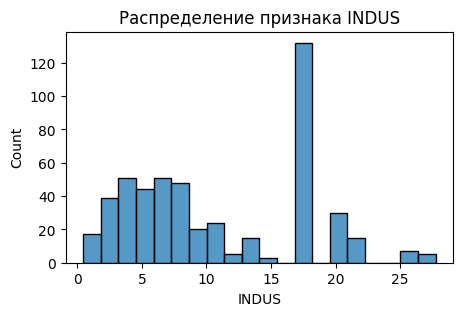

In [29]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

df = df[['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'MEDV']]

print(df['INDUS'].describe())

print(f"Асимметричность: {skew(df['INDUS']):.3f}")
print(f"Эксцесс: {kurtosis(df['INDUS']):.3f}")
print(f"Медиана: {df['INDUS'].median():.2f}")
print(f"Мода: {df['INDUS'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['INDUS'], bins=20)
plt.title('Распределение признака INDUS')
plt.xlabel('INDUS')
plt.show()

**Вывод:**
Среднее = 11.14, медиана = 9.69, мода = 18.10 → среднее и медиана близки, мода выше, асимметрия = 0.29 → почти симметричное распределение, эксцесс = -1.23 → плосковерхое распределение, распределение *близко к нормальному* по асимметрии, но плосковерхое

### Первичный анализ признака NOX (концентрация оксидов азота (в частях на 10 миллионов)):

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64
Асимметричность: 0.727
Эксцесс: -0.076
Медиана: 0.54
Мода: 0.54


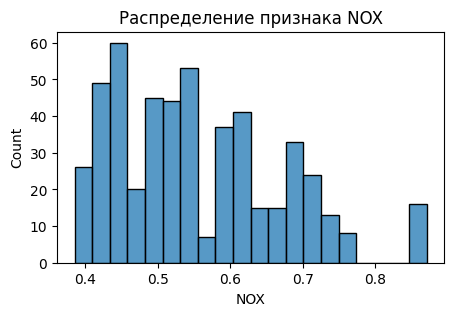

In [15]:
print(df['NOX'].describe())

print(f"Асимметричность: {skew(df['NOX']):.3f}")
print(f"Эксцесс: {kurtosis(df['NOX']):.3f}")
print(f"Медиана: {df['NOX'].median():.2f}")
print(f"Мода: {df['NOX'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['NOX'], bins=20)
plt.title('Распределение признака NOX')
plt.xlabel('NOX')
plt.show()

**Вывод:**
Среднее = 0.55, медиана = 0.54, мода = 0.54 → все три меры центральной тенденции очень близки, асимметрия = 0.73 → умеренная правосторонняя асимметрия, эксцесс = -0.08 → почти как у нормального распределения по "остроте", распределение умеренно смещено вправо, но в целом *близко к нормальному*.

### Первичный анализ признака RM (среднее количество комнат в жилом помещении):

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64
Асимметричность: 0.402
Эксцесс: 1.861
Медиана: 6.21
Мода: 5.71


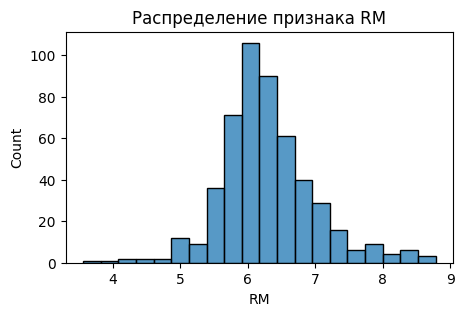

In [16]:
print(df['RM'].describe())

print(f"Асимметричность: {skew(df['RM']):.3f}")
print(f"Эксцесс: {kurtosis(df['RM']):.3f}")
print(f"Медиана: {df['RM'].median():.2f}")
print(f"Мода: {df['RM'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['RM'], bins=20)
plt.title('Распределение признака RM')
plt.xlabel('RM')
plt.show()

**Вывод:**
Среднее = 6.28, медиана = 6.21, мода = 5.71 → среднее и медиана близки, мода ниже, асимметрия = 0.40 → слабая правосторонняя асимметрия, эксцесс = 1.86 → островерхлое распределение, распределение *умеренно отличается от нормального* из-за острого пика.

### Первичный анализ признака AGE (доля квартир, принадлежащих владельцам и построенных до 1940 года):

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64
Асимметричность: -0.597
Эксцесс: -0.970
Медиана: 77.50
Мода: 100.00


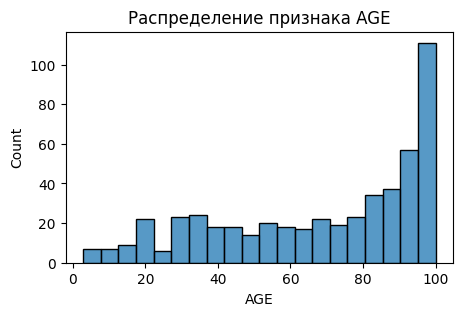

In [17]:
print(df['AGE'].describe())

print(f"Асимметричность: {skew(df['AGE']):.3f}")
print(f"Эксцесс: {kurtosis(df['AGE']):.3f}")
print(f"Медиана: {df['AGE'].median():.2f}")
print(f"Мода: {df['AGE'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['AGE'], bins=20)
plt.title('Распределение признака AGE')
plt.xlabel('AGE')
plt.show()

**Вывод:**
Среднее = 68.57, медианы = 77.50, моды = 100.00 → левосторонняя асимметрия, асимметрия = -0.60 → умеренная левосторонняя асимметрия, эксцесс = -0.97 → плосковерхое распределение, распределение *не нормальное*, смещено влево.

### Первичный анализ признака DIS (взвешенное расстояние до пяти центров занятости в Бостоне):

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64
Асимметричность: 1.009
Эксцесс: 0.471
Медиана: 3.21
Мода: 3.50


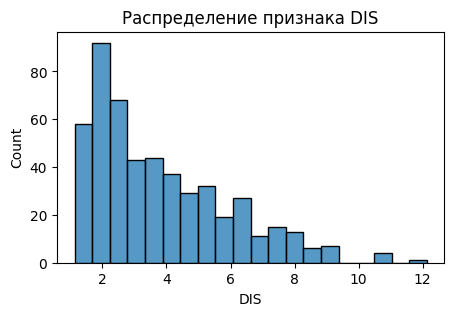

In [18]:
print(df['DIS'].describe())

print(f"Асимметричность: {skew(df['DIS']):.3f}")
print(f"Эксцесс: {kurtosis(df['DIS']):.3f}")
print(f"Медиана: {df['DIS'].median():.2f}")
print(f"Мода: {df['DIS'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['DIS'], bins=20)
plt.title('Распределение признака DIS')
plt.xlabel('DIS')
plt.show()

**Вывод:**
Среднее = 3.80, медиана = 3.21, мода = 3.50 → правосторонняя асимметрия, асимметрия = 1.01 → умеренная правосторонняя асимметрия, эксцесс = 0.47 → незначительно острый пик, распределение *отличается от нормального*.

### Первичный анализ признака TAX (ставка полного налога на недвижимость на каждые 10 000 долларов стоимости):

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64
Асимметричность: 0.668
Эксцесс: -1.143
Медиана: 330.00
Мода: 666.00


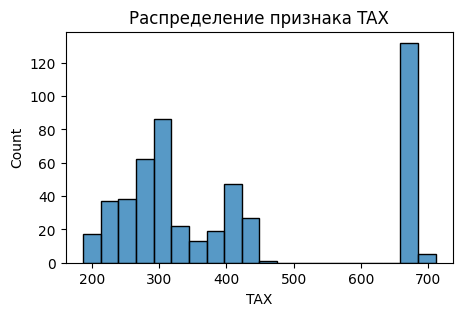

In [19]:
print(df['TAX'].describe())

print(f"Асимметричность: {skew(df['TAX']):.3f}")
print(f"Эксцесс: {kurtosis(df['TAX']):.3f}")
print(f"Медиана: {df['TAX'].median():.2f}")
print(f"Мода: {df['TAX'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['TAX'], bins=20)
plt.title('Распределение признака TAX')
plt.xlabel('TAX')
plt.show()

**Вывод:**
Среднее = 408.24, медиана = 330.00, мода = 666.00 → бимодальное распределение, асимметрия = 0.67 → умеренная правосторонняя асимметрия, эксцесс = -1.14 → плосковерхое, распределение *не нормальное*, с двумя пиками

### Первичный анализ признака PTRATIO (соотношение числа учащихся к числу учителей по городу):

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64
Асимметричность: -0.800
Эксцесс: -0.294
Медиана: 19.05
Мода: 20.20


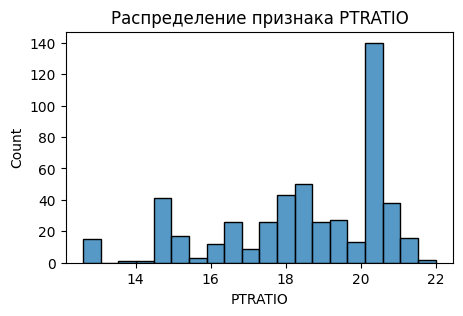

In [20]:
print(df['PTRATIO'].describe())

print(f"Асимметричность: {skew(df['PTRATIO']):.3f}")
print(f"Эксцесс: {kurtosis(df['PTRATIO']):.3f}")
print(f"Медиана: {df['PTRATIO'].median():.2f}")
print(f"Мода: {df['PTRATIO'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['PTRATIO'], bins=20)
plt.title('Распределение признака PTRATIO')
plt.xlabel('PTRATIO')
plt.show()

**Вывод:**
Среднее = 18.46, медиана = 19.05, мода = 20.20 → левосторонняя асимметрия, асимметрия = -0.80 → умеренная левосторонняя асимметрия, эксцесс = -0.29 → почти нормальный, распределение смещено влево, но в целом *умеренное отклонение от нормальности*.

### Первичный анализ признака MEDV (медианная стоимость принадлежащих владельцам домов в тысячах долларов США (k$)):

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64
Асимметричность: 1.105
Эксцесс: 1.469
Медиана: 21.20
Мода: 50.00


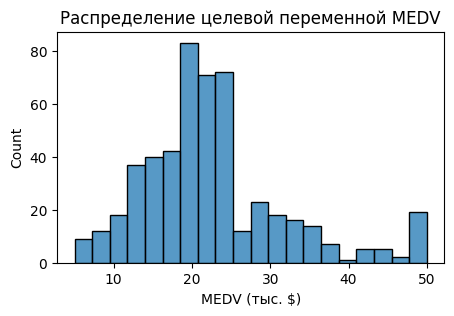

In [21]:
print(df['MEDV'].describe())

print(f"Асимметричность: {skew(df['MEDV']):.3f}")
print(f"Эксцесс: {kurtosis(df['MEDV']):.3f}")
print(f"Медиана: {df['MEDV'].median():.2f}")
print(f"Мода: {df['MEDV'].mode()[0]:.2f}")

plt.figure(figsize=(5, 3))
sns.histplot(df['MEDV'], bins=20)
plt.title('Распределение целевой переменной MEDV')
plt.xlabel('MEDV (тыс. $)')
plt.show()

**Вывод:**
Среднее = 22.53, медиана = 21.20, мода = 50.00 → мода = максимум → цензурирование данных, асимметрия = 1.11 → умеренная правосторонняя асимметрия, эксцесс = 1.47 → островерхлое распределение, распределение *не нормальное* из-за цензурирования сверху.

### Корреляционная матрица:

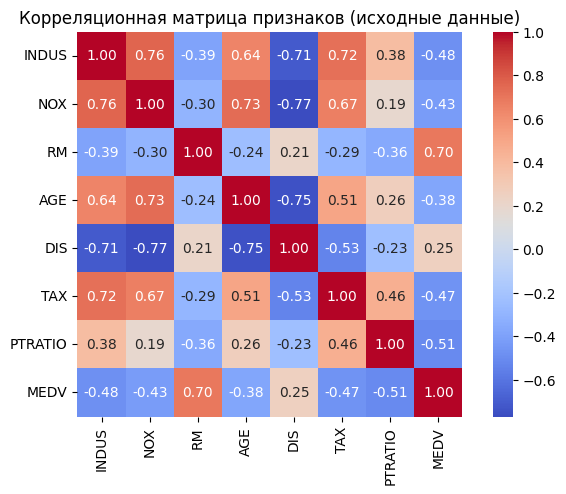

In [30]:
plt.figure(figsize=(8, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Корреляционная матрица признаков (исходные данные)')
plt.show()

### Расчёт VIF-коэффициента:

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('MEDV', axis=1)

vif_data = pd.DataFrame()
vif_data["Признак"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print (vif_data)

   Признак        VIF
0    INDUS  12.984279
1      NOX  66.839312
2       RM  51.248153
3      AGE  18.678109
4      DIS  10.392020
5      TAX  16.758295
6  PTRATIO  60.977464


**Вывод:**
Все признаки имеют VIF значительно выше 10, что указывает на сильную мультиколлинеарность между ними. Особенно критичны значения для NOX, PTRATIO и RM (VIF > 50), что делает коэффициенты линейной регрессии крайне нестабильными и неинтерпретируемыми.

## 3. Подготовка данных.

In [27]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
MEDV       0
PTRATIO    0
RM         0
NOX        0
TAX        0
AGE        0
DIS        0
INDUS      0
dtype: int64


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

Результаты показали, что во всех столбцах отсутствуют пропущенные значения. Для объективной оценки качества модели данные были разделены на обучающую выборку (`train`) — 80% наблюдений и тестовую выборку (`test`) — 20% наблюдений. Разделение выполнено с использованием функции `train_test_split` из библиотеки `scikit-learn` с параметрами `test_size=0.2` — доля тестовой выборки и `random_state=42` — фиксация генератора случайных чисел для воспроизводимости результатов.

Поскольку признаки имеют разные физические единицы измерения и масштабы (например, `TAX` принимает значения от 187 до 711, а `NOX` — от 0.38 до 0.87), была применена стандартизация(Z-нормализация) с использованием класса `StandardScaler`.

Для каждого признака X (столбца данных) стандартизация вычисляется по формуле: \(X_scaled = (X - μ)/ σ\), 
где:
X — исходное значение признака,
μ — среднее арифметическое признака (рассчитано по обучающей выборке),
σ — стандартное отклонение признака (тоже по обучающей выборке).

## 3. Ход работы

### Построение регрессионных моделей:

На этапе построения базовых моделей были рассмотрены два подхода к решению задачи регрессии: **линейная регрессия** и **гребневая регрессия**. Обе модели обучались на стандартизированных исходных признаках (`X_train_scaled`) без применения методов снижения размерности.

**1. Линейная регрессия**
Мы хотим предсказать целевую переменную (например, цену дома MEDV) как линейную комбинацию признаков:
\(y* = β_0 + β_1 x_1 + β_2 x_2 + ... + β_n x_n\)
​где:
\(y*\) — предсказание модели,
\(x_1, x_2, ..., x_n\) — признаки (например, RM, TAX, NOX),
\(β_0\) — смещение (intercept),
\(β_1, ..., β_n\) — коэффициенты, которые модель должна научиться подбирать.
​Нужно найти такие коэффициенты \(β\), чтобы ошибки предсказаний были минимальны. Используется среднеквадратичная ошибка (MSE).
\(Loss_линейная = MSE\)

**2. Гребневая регрессия**
Та же линейная модель, но с наказанием за большие коэффициенты.
\(Loss_линейная = MSE + L2-штраф\)

\(Loss\) — это числовая мера ошибки модели, по которому мы считаем «насколько плохо» модель работает.

\(RMSE\) — среднеквадратичная ошибка.
\(R²\) — коэффициент детерминации, показывает какую долю дисперсии (разброса) целевой переменной объясняет модель.
\(MAPE\) — средняя абсолютная процентная ошибка.

In [54]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Линейная регрессионная модель.

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mape(y_test, y_pred_lr)

cv_rmse_lr = np.sqrt(-cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

rmse_cv_lr = cv_rmse_lr.mean()
r2_cv_lr = cv_r2_lr.mean()

# Гребневая регрессионная модель.

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mape_ridge = mape(y_test, y_pred_ridge)

cv_rmse_ridge = np.sqrt(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_ridge = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

rmse_cv_ridge = cv_rmse_ridge.mean()
r2_cv_ridge = cv_r2_ridge.mean()

results_before_pca = pd.DataFrame({
    'Модель': ['Лин. регрессия', 'Греб. регрессия'],
    'RMSE(test)': [rmse_lr, rmse_ridge],
    'R²(test)': [r2_lr, r2_ridge],
    'MAPE(%)(test)': [mape_lr, mape_ridge],
    'RMSE(CV)': [rmse_cv_lr, rmse_cv_ridge],
    'R²(CV)': [r2_cv_lr, r2_cv_ridge]
})
print(results_before_pca.round(4))

            Модель  RMSE(test)  R²(test)  MAPE(%)(test)  RMSE(CV)  R²(CV)
0   Лин. регрессия      5.6652    0.5624        18.3370    5.5437  0.6333
1  Греб. регрессия      5.6584    0.5634        18.1199    5.5756  0.6294


**Выводы:**
Обе модели демонстрируют практически одинаковые значения метрик. Гребневая регрессия показывает незначительное улучшение по всем показателям (меньший RMSE и MAPE, чуть выше R² на тесте), что говорит о её небольшом преимуществе в условиях мультиколлинеарности.

Значения метрик для двух моделей при кросс-валидации (CV) и на тестовой выборке близки, но не идентичны: R²(CV)> R²(test).

RMSE ≈ 5.66 означает, что средняя ошибка предсказания цены дома составляет около 5.66 тысяч долларов.
R² ≈ 0.56 говорит о том, что модель объясняет 56% дисперсии целевой переменной `MEDV`.
MAPE ≈ 18% указывает, что в среднем модель ошибается на 18% от истинной стоимости дома — это приемлемый результат для социально-экономических данных.

Обе модели работают стабильно и сопоставимо. Гребневая регрессия демонстрирует небольшое преимущество, что подтверждает её полезность при наличии мультиколлинеарности. Однако для значительного улучшения качества, потребуется  снижение размерности (с помощью PCA), что и будет выполнено на следующем этапе работы.

### Устранение мультиколлинеарности с помощью PCA:

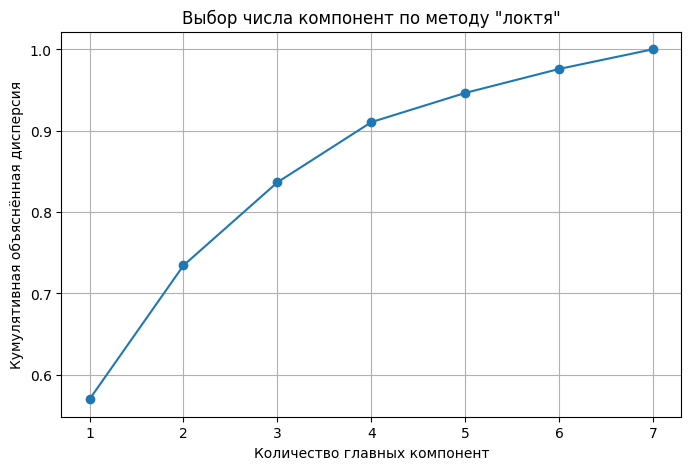

Для объяснения 95% дисперсии достаточно 6 главных компонентов.


In [55]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_train_scaled)

cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, marker='o', linestyle='-')
plt.xlabel('Количество главных компонент')
plt.ylabel('Кумулятивная объяснённая дисперсия')
plt.title('Выбор числа компонент по методу "локтя"')
plt.grid(True)
plt.show()

n_components = np.argmax(cumsum_var >= 0.95) + 1
print(f"Для объяснения 95% дисперсии достаточно {n_components} главных компонентов.")

### Построение регрессионных моделей с использованием главных компонентов:

In [56]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Линейная регрессия на главных компонентах.

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)

rmse_lr_pca = np.sqrt(mean_squared_error(y_test, y_pred_lr_pca))
r2_lr_pca = r2_score(y_test, y_pred_lr_pca)
mape_lr_pca = mape(y_test, y_pred_lr_pca)

cv_rmse_lr_pca = np.sqrt(-cross_val_score(lr_pca, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_lr_pca = cross_val_score(lr_pca, X_train_pca, y_train, cv=5, scoring='r2')

rmse_cv_lr_pca = cv_rmse_lr_pca.mean()
r2_cv_lr_pca = cv_r2_lr_pca.mean()

# Гребневая регрессия на главных компонентах.

ridge_pca = Ridge(alpha=1.0)
ridge_pca.fit(X_train_pca, y_train)
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)

rmse_ridge_pca = np.sqrt(mean_squared_error(y_test, y_pred_ridge_pca))
r2_ridge_pca = r2_score(y_test, y_pred_ridge_pca)
mape_ridge_pca = mape(y_test, y_pred_ridge_pca)

cv_rmse_ridge_pca = np.sqrt(-cross_val_score(ridge_pca, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2_ridge_pca = cross_val_score(ridge_pca, X_train_pca, y_train, cv=5, scoring='r2')

rmse_cv_ridge_pca = cv_rmse_ridge_pca.mean()
r2_cv_ridge_pca = cv_r2_ridge_pca.mean()

results_after_pca = pd.DataFrame({
    'Модель': ['Лин. регрессия', 'Греб. регрессия'],
    'RMSE(test)': [rmse_lr_pca, rmse_ridge_pca],
    'R²(test)': [r2_lr_pca, r2_ridge_pca],
    'MAPE(%)(test)': [mape_lr_pca, mape_ridge_pca],
    'RMSE(CV)': [rmse_cv_lr_pca, rmse_cv_ridge_pca],
    'R²(CV)': [r2_cv_lr_pca, r2_cv_ridge_pca]
})

print(results_after_pca.round(4))

            Модель  RMSE(test)  R²(test)  MAPE(%)(test)  RMSE(CV)  R²(CV)
0   Лин. регрессия      5.7529    0.5487        18.2318    5.6318  0.6217
1  Греб. регрессия      5.7483    0.5494        18.2173    5.6316  0.6218


### Сравнение метрик качества моделей:

In [57]:
comparison = pd.concat([
    results_before_pca.assign(),
    results_after_pca.assign()
], ignore_index=True)

print("\nСравнение моделей до и после PCA:")
print(comparison.round(4))


Сравнение моделей до и после PCA:
            Модель  RMSE(test)  R²(test)  MAPE(%)(test)  RMSE(CV)  R²(CV)
0   Лин. регрессия      5.6652    0.5624        18.3370    5.5437  0.6333
1  Греб. регрессия      5.6584    0.5634        18.1199    5.5756  0.6294
2   Лин. регрессия      5.7529    0.5487        18.2318    5.6318  0.6217
3  Греб. регрессия      5.7483    0.5494        18.2173    5.6316  0.6218


**Вывод:**
Сравнение моделей показало, что применение PCA привело к незначительному снижению качества: 
- R² уменьшился с 0.563 до 0.549, 
- RMSE вырос с 5.66 до 5.75. 

Это объясняется потерей 5% информации при снижении размерности. Однако PCA полностью устранил мультиколлинеарность, что сделало модели более устойчивыми. 
Кроме того, разница между линейной и гребневой регрессией после PCA почти исчезла.

### Проверка устранения мультикалинеарности:

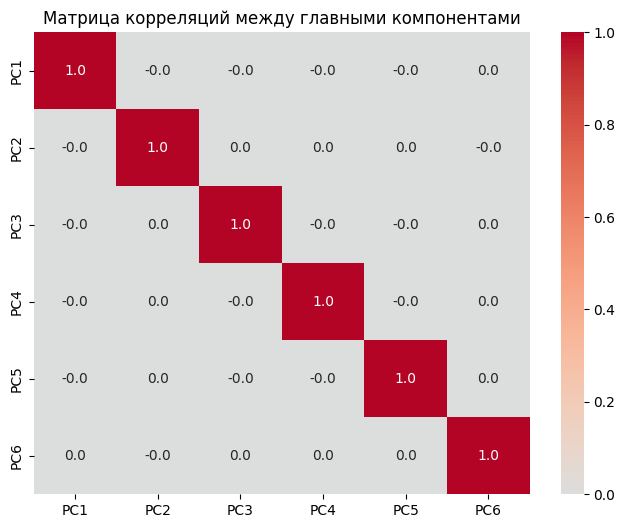

In [58]:
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

corr_pca = pca_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pca, annot=True, cmap='coolwarm', center=0, fmt=".1f")
plt.title('Матрица корреляций между главными компонентами')
plt.show()

## 5. Заключение

В результате выполнения лабораторной работы были построены линейная и гребневая регрессионные модели на предварительно подготовленных данных датасета Boston Housing. Анализ выявил сильную мультиколлинеарность между признаками: все переменные имели коэффициент VIF значительно выше 10 (максимальный — 66.84 для признака NOX), а корреляционная матрица подтвердила наличие выраженных линейных зависимостей. Для устранения мультиколлинеарности был применён метод главных компонент (PCA) с сохранением 95% объяснённой дисперсии, что потребовало 6 компонент из 7 исходных признаков. Модели, обученные на исходных данных, продемонстрировали несколько лучшее качество по сравнению с моделями на главных компонентах: коэффициент детерминации R² снизился с 0.563 до 0.549, а RMSE увеличился с 5.66 до 5.75. Это связано с неизбежной потерей 5% информации при снижении размерности. Тем не менее, PCA полностью устранил мультиколлинеарность — корреляции между главными компонентами оказались практически нулевыми (максимальная абсолютная корреляция < 0.001), что обеспечило устойчивость и надёжность моделей. Таким образом, несмотря на незначительное снижение точности, применение PCA оправдано в задачах с сильной мультиколлинеарностью, поскольку обеспечивает более корректную и стабильную основу для построения регрессионных моделей.